In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
tropics = pd.read_csv('Continental United States Tropical Storms Impacts:Landfalls 1851-1970, 1983-2021.csv')

In [3]:
canes = pd.read_csv('Continental United States Hurricane Impacts:Landfalls 1851-2021.csv')

In [4]:
tropics.columns

Index(['storm #', 'date', 'time', 'lat_n', 'lon_w', 'max_winds(kt)',
       'landfall_state', 'storm_names'],
      dtype='object')

In [5]:
canes.columns

Index(['year', 'month', 'affected_states', 'category', 'mb_pressure',
       'wind_kt', 'name'],
      dtype='object')

In [6]:
tropics.shape

(392, 8)

In [7]:
canes.shape

(338, 7)

In [8]:
tropics.head()

,storm #,date,time,lat_n,lon_w,max_winds(kt),landfall_state,storm_names
0,6,10/19/1851,1500Z,41.1,71.7,50,NY,NaN
1,3,8/19/1856,1100Z,34.8,76.4,50,NC,NaN
2,4,9/30/1857$,1000Z,25.8,97.0,50,TX,NaN
3,3,9/14/1858$,1500Z,27.6,82.7,60,FL,NaN
4,3,9/16/1858*,0300Z,35.2,75.2,50,NC,NaN


### find missing values

### find outliars

Saving figure attribute_histogram_plots


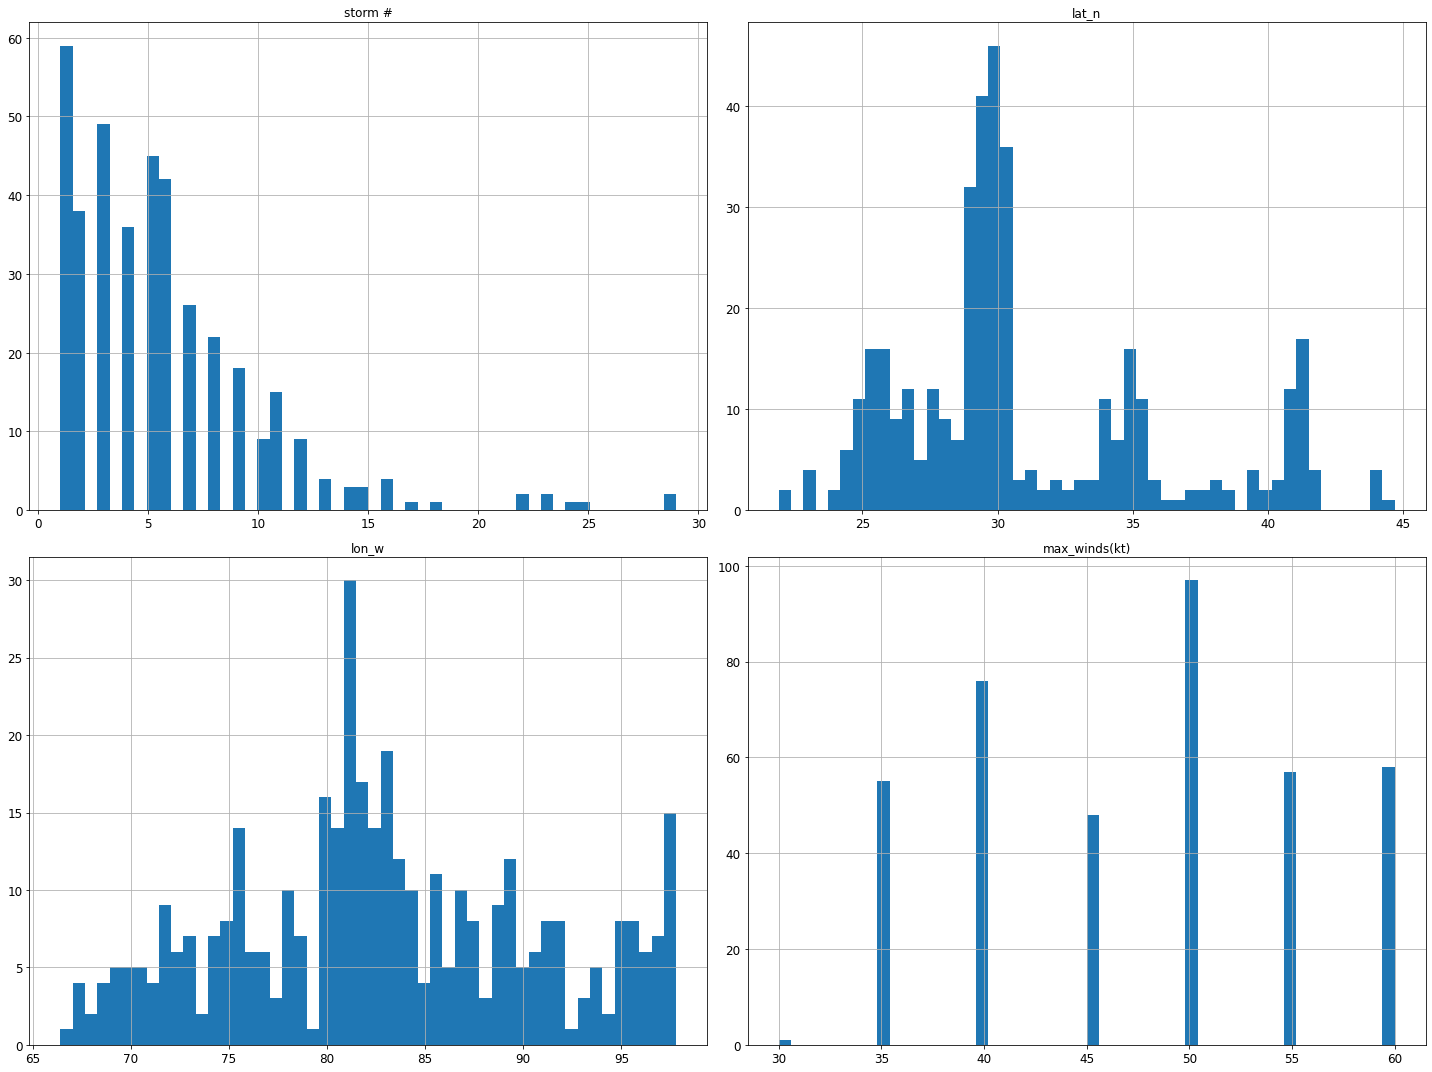

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
tropics.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()


In [10]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(tropics, test_size=0.2, random_state=42)



In [12]:
test_set.head()

,storm #,date,time,lat_n,lon_w,max_winds(kt),landfall_state,storm_names
78,4,9/12/1892,0700Z,29.0,90.6,50,LA,NaN
274,9,10/18/65,1500Z,29.4,81.1,55,FL,Unnamed
246,10,10/8/59,1000Z,30.3,87.6,40,AL,Irene
55,4,9/23/1885*,0300Z,41.6,69.7,50,MA,NaN
387,5,7/9/21,1630Z,41.4,71.7,50,RI,Elsa


<AxesSubplot:>

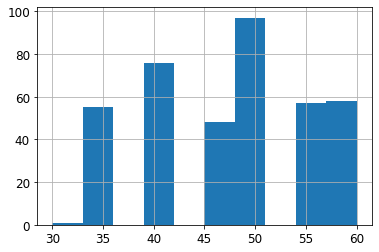

In [13]:
tropics["max_winds(kt)"].hist()

In [14]:
tropics.dtypes

storm #             int64
date               object
time               object
lat_n             float64
lon_w             float64
max_winds(kt)       int64
landfall_state     object
storm_names        object
dtype: object

In [15]:
tropics['lon_w'].astype(float)

0      71.7
1      76.4
2      97.0
3      82.7
4      75.2
       ... 
387    71.7
388    85.4
389    71.6
390    71.8
391    85.1
Name: lon_w, Length: 392, dtype: float64

Saving figure bad_visualization_plot


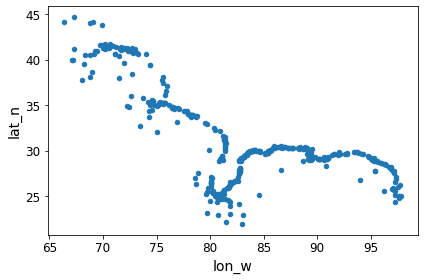

In [16]:
tropics.plot(kind="scatter", x="lon_w", y="lat_n")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


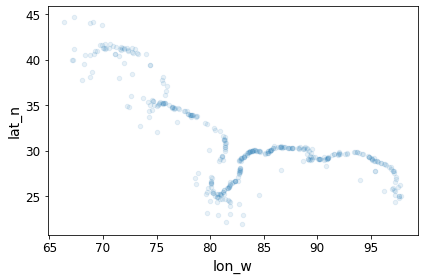

In [17]:
tropics.plot(kind="scatter", x="lon_w", y="lat_n", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


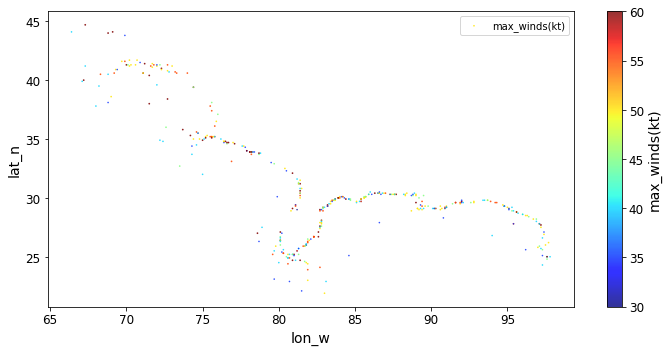

In [18]:
tropics.plot(kind="scatter", x="lon_w", y="lat_n", alpha=0.8,
             s=tropics["max_winds(kt)"]/100, label="max_winds(kt)", figsize=(10,5),
             c="max_winds(kt)", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")
